In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("./air_quality_index_dataset.csv")

In [3]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


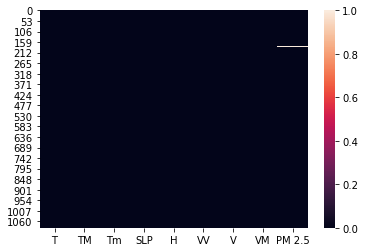

In [4]:
sns.heatmap(data.isnull())

In [5]:
data = data.dropna()

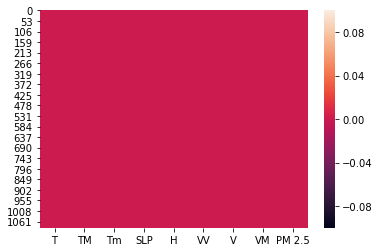

In [6]:
sns.heatmap(data.isnull())

In [7]:
ind_feat = data.iloc[:,:-1]
dep_feat = data.iloc[:,-1]

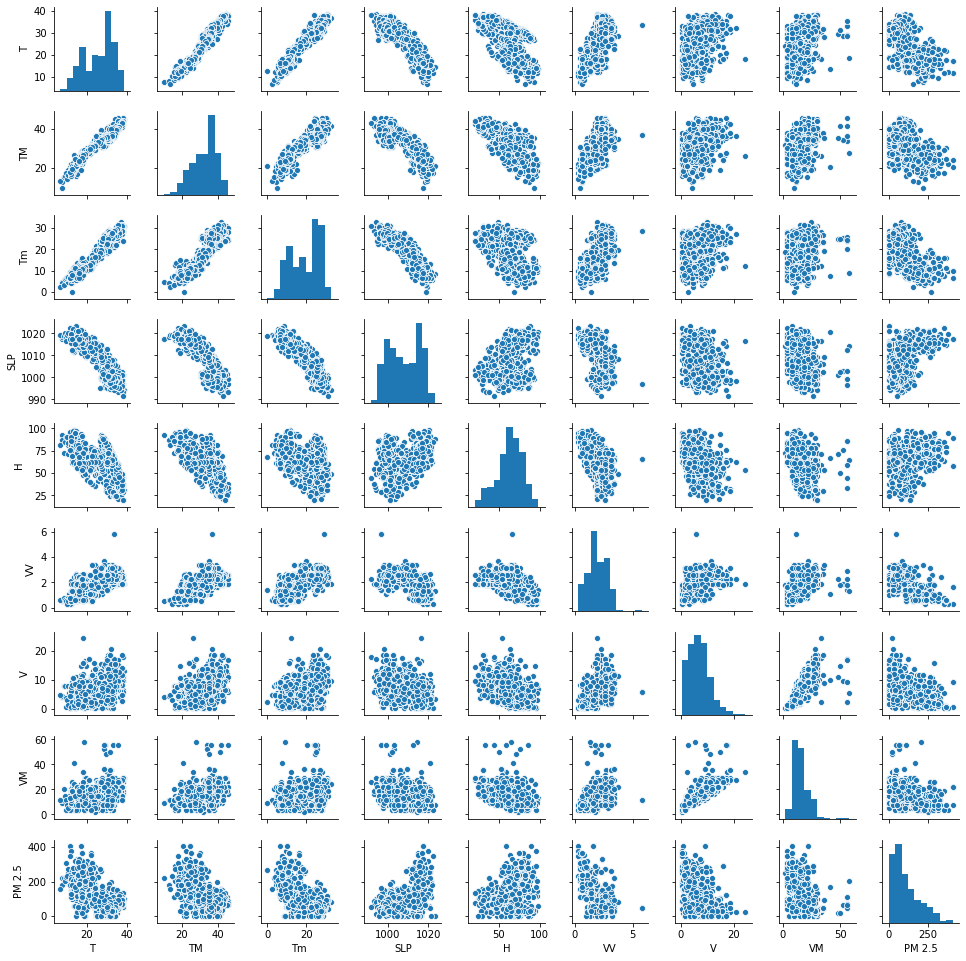

In [8]:
sns.pairplot(data, height = 1.5)

In [9]:
correlation_matrix = data.corr()
correlation_matrix

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


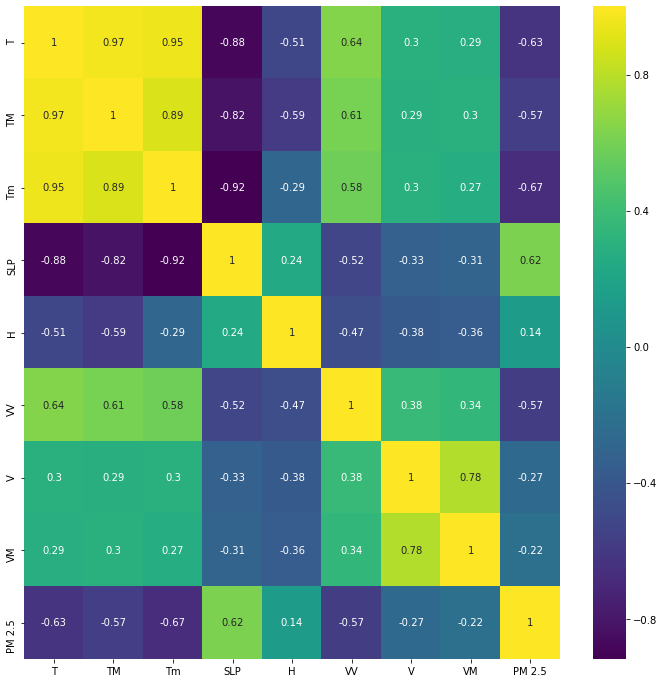

In [10]:
correlation_features = correlation_matrix.index
plt.figure(figsize=(12,12))
g=sns.heatmap(data[correlation_features].corr(),annot=True,cmap="viridis")

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


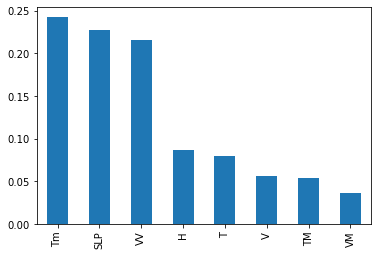

In [11]:
model = ExtraTreesRegressor()
model.fit(ind_feat,dep_feat)
feature_importances = pd.Series(model.feature_importances_, index=ind_feat.columns)
feature_importances.nlargest(8).plot(kind='bar')
plt.show()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(ind_feat, dep_feat, test_size=0.40, random_state=0)

In [13]:
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
prediction = regression.predict(X_test)
metrics.mean_squared_error(Y_test, prediction)

3548.7792584091912

In [15]:
r2_score(Y_test, prediction)

0.5077079517607501